In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
from keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model

!pip install keract
import keract

In [ ]:
!unzip /content/report_model_bf_scfi_lstm_3-20220425T130547Z-001.zip

Archive:  /content/report_model_bf_scfi_lstm_3-20220425T130547Z-001.zip
  inflating: report_model_bf_scfi_lstm_3/train_acc.npy  
  inflating: report_model_bf_scfi_lstm_3/real_values.npy  
  inflating: report_model_bf_scfi_lstm_3/test_acc.npy  
  inflating: report_model_bf_scfi_lstm_3/predictions.npy  
  inflating: report_model_bf_scfi_lstm_3/model_history.npy  
  inflating: report_model_bf_scfi_lstm_3/model/keras_metadata.pb  
   creating: report_model_bf_scfi_lstm_3/model/assets/
  inflating: report_model_bf_scfi_lstm_3/model/saved_model.pb  
  inflating: report_model_bf_scfi_lstm_3/test_arrays.npy  
  inflating: report_model_bf_scfi_lstm_3/model/variables/variables.index  
  inflating: report_model_bf_scfi_lstm_3/model/variables/variables.data-00000-of-00001  


In [ ]:
loaded_model = load_model('/content/report_model_bf_scfi_lstm_3/model')
input_data = np.load('/content/report_model_bf_scfi_lstm_3/test_arrays.npy')
input_data = np.float32(input_data)

In [ ]:
for layer in loaded_model.layers:
    print(layer.name)

input_3
time_distributed_15
time_distributed_16
time_distributed_19
time_distributed_20
time_distributed_21
time_distributed_22
time_distributed_23
time_distributed_24
time_distributed_25
time_distributed_26
input_4
time_distributed_27
conv2d_10
time_distributed_28
max_pooling2d_6
time_distributed_29
batch_normalization_6
lstm_2
conv2d_11
dropout_9
max_pooling2d_7
lstm_3
batch_normalization_7
flatten_4
flatten_5
concatenate_1
dense_5
dropout_11
dense_6
dropout_12
dense_7
dropout_13
dense_8
dense_9


In [ ]:
print(np.shape(input_data))

img_n = 10

input_1 = input_data[img_n,1,:,:,:]
input_2 = input_data[img_n,1:,:,:]

input_1 = input_1[None,:]
input_2 = input_2[None,:]

print(np.shape(input_1))
print(np.shape(input_2))

print(np.shape(input_1[0,:,:,0]))

(119, 11, 200, 200, 1)
(1, 200, 200, 1)
(1, 10, 200, 200, 1)
(200, 200)


In [ ]:
activations = keract.get_activations(loaded_model, [input_1,input_2], layer_names=['conv2d_11'], nodes_to_evaluate=None, output_format='simple', nested=False, auto_compile=True)

conv2d_11 (1, 64, 64, 64) 


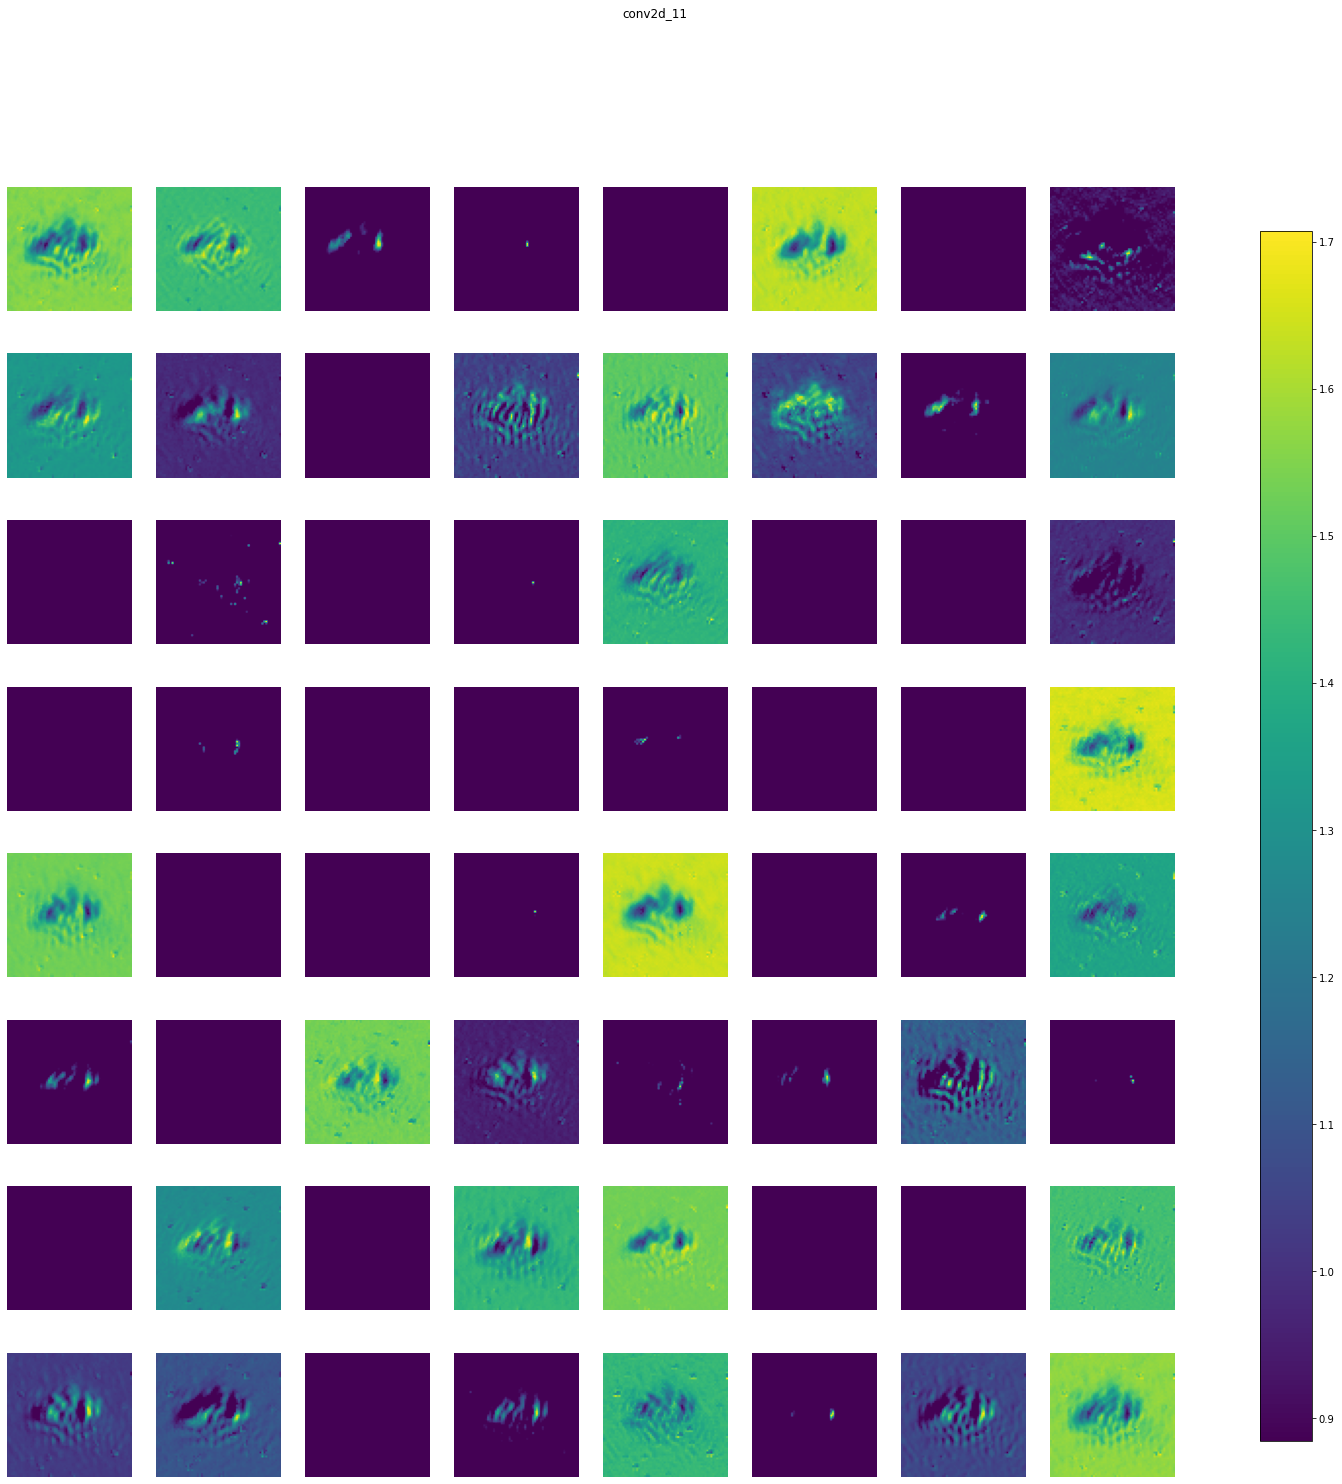

In [ ]:
keract.display_activations(activations, cmap=None, save=False, directory='.', data_format='channels_last', fig_size=(24, 24), reshape_1d_layers=False)

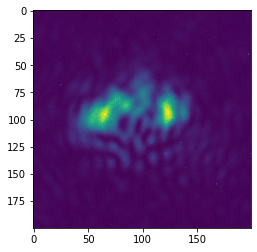

In [ ]:
sum = np.zeros(shape=(64,64))

plt.imshow(activations['conv2d_11'][0,:,:,2])

for i in range(64):
  sum += activations['conv2d_11'][0,:,:,i]
  
sum /= 64

import matplotlib.pyplot as plt
plt.imshow(input_data[img_n,1,:,:,0])

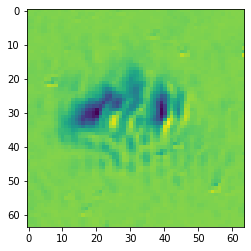

In [ ]:
plt.imshow(sum)

In [ ]:
predictions = np.load('/content/report_model_bf_scfi_lstm_3/predictions.npy')
real_values = np.load('/content/report_model_bf_scfi_lstm_3/real_values.npy')

In [ ]:
print(np.shape(predictions))
print(np.shape(real_values))

for i,item in enumerate(predictions):

  predictions[np.where(predictions[i] == np.max(predictions[i]))[0][0]] = 1
  predictions[i] = [0,0,0]
  

  print(np.max(predictions[i]))
  print()

#print(predictions)

#print(predictions[0])
#print(real_values[0])

(119, 3)
(119, 3)
0.9999989
1
0.9999989
1
0.97575593
2
0.9999994
1
0.82973963
2
1.0
1
0.99999833
1
0.90945745
0
1.0
1
0.92881227
0
0.939085
0
0.90648407
2
0.9691385
0
0.9999864
2
0.99999976
1
0.47942492
1
0.99992514
2
0.9943117
0
0.83746225
2
0.99999297
2
0.9999157
1
0.9493518
0
0.99147964
0
0.96471745
0
0.99995697
2
0.9031007
2
0.99999964
1
1.0
1
0.98770744
0
1.0
1
0.9946344
0
1.0
1
0.7323698
1
0.9674057
0
0.9809379
2
1.0
1
0.5387641
0
1.0
1
0.9775834
0
0.60406166
1
0.9998084
2
0.9997385
2
0.9694752
0
0.97429854
0
0.9862412
2
1.0
1
0.9686405
0
0.96705395
0
0.70244163
2
0.97621447
0
0.91829836
0
0.9938777
0
0.99984705
2
0.99344593
0
0.9888707
2
0.7414936
2
0.9999999
1
0.5384315
0
0.55499226
1
0.99999964
1
1.0
1
0.9984617
2
0.9787507
0
0.9270351
2
0.9877741
1
0.97329026
2
0.9979608
2
0.8303745
0
0.9994665
2
0.99998677
1
0.99985254
1
0.9866455
2
1.0
1
0.9709995
0
0.999966
1
0.99345994
0
1.0
1
0.8531612
2
0.9994992
2
0.8171208
2
0.9815248
0
0.99906534
1
0.95899147
2
0.8868643
2
0.9999988


Text(0.5, 1.0, 'Validation loss per epoch')

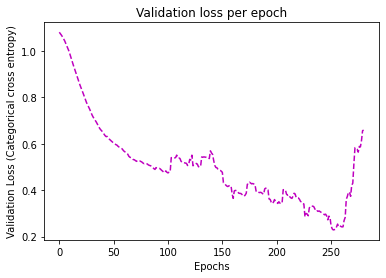

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
history = np.load('/content/model_history.npy', allow_pickle=True)

val_loss = history.item()['val_loss'][:300]
val_acc = history.item()['val_accuracy'][:300]

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

#print(moving_average(val_loss, 20))
# array([4. , 5.5, 9. , 6. , 1.5, 3. , 3. , 0.5, 1. ])

x = np.arange(0,len(val_loss)-19)
#print(x)

plt.plot(x,moving_average(val_loss, 20),linestyle='dashed',color='m')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss (Categorical cross entropy)')
plt.title('Validation loss per epoch')

Text(0.5, 1.0, 'Validation accuracy per epoch')

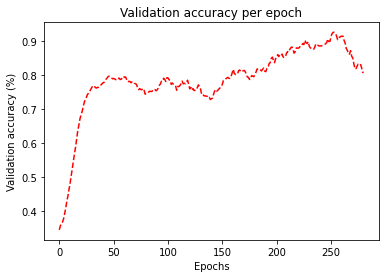

In [ ]:
plt.plot(x,moving_average(val_acc, 20), linestyle='dashed',color='r')
plt.xlabel('Epochs')
plt.ylabel('Validation accuracy (%)')
plt.title('Validation accuracy per epoch')

In [ ]:
model = load_model('/content/report_model_bf_scfi_lstm_3/model')
test_arrays = np.float32(np.load('/content/report_model_bf_scfi_lstm_3/test_arrays.npy'))

In [ ]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

In [ ]:
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [ ]:
model.layers[-1].activation = None

# Print what the top predicted class is
preds =np.float32(np.load('/content/report_model_bf_scfi_lstm_3/predictions.npy'))
#print("Predicted:", decode_predictions(preds, top=1)[0])

img_array = test_arrays[:,1:,:,:,0]

# Generate class activation heatmap
heatmap = make_gradcam_heatmap(img_array, model, 'time_distributed_24')

# Display heatmap
plt.matshow(heatmap)
plt.show()

ValueError: ignored